<h3>Algoritmo Genético para sintonización de un controlador PD(proporcionl diferencial)</h3>

In [6]:
# Librerías requeridas
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
def respuesta(kp, kd, ad, a0, t):
    # Crear un arreglo de ceros del mismo tamaño que el arreglo de tiempo t
    a = np.zeros(t.size)

    # Recorrer el arreglo de tiempo t
    for i in range(t.size):
        if i < 2:
            # Si el índice es menor a 2, asignar el valor inicial a0 a la posición i del arreglo a
            a[i] = a0
        else:
            # Calcular el cambio de tiempo dt entre el instante actual y el anterior
            dt = t[i] - t[i-1]

            # Calcular el valor de a[i] utilizando la fórmula del algoritmo genético
            a[i] = (kp*dt**2*ad + a[i-1]*(2 + kd*dt) - a[i-2]) / (1 + kp*dt**2 + kd*dt)

    # Devolver el arreglo a con los valores de a en cada instante de tiempo
    return a


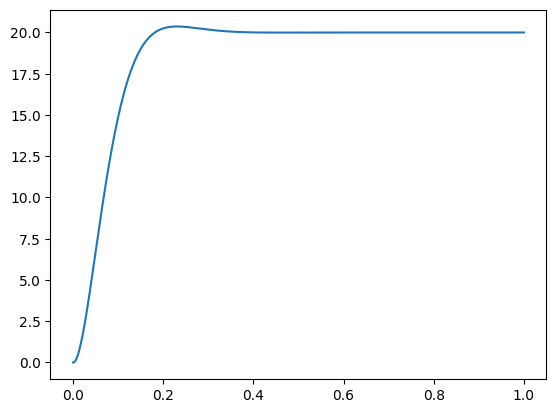

In [38]:
ad = 20    # altura de destino
a0 = 0     # altura inicial
kp = 500   # constante proporcional
kd = 35    # constante diferencial
t = np.linspace(0, 1, 1000)   # arreglo de tiempo equiespaciado de 0 a 1

# Obtener la respuesta de altura utilizando la función respuesta
a = respuesta(kp, kd, ad, a0, t)

# Graficar la respuesta
plt.plot(t, a)
plt.show()

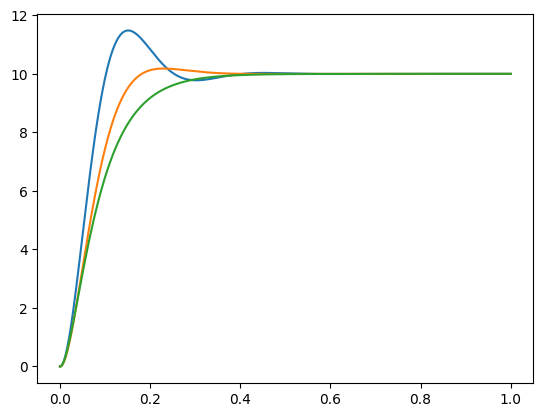

In [37]:
# Tres respuestas posibles con diferentes valores de kd
a1 = respuesta(600, 25, ad, a0, t)
a2 = respuesta(500, 35, ad, a0, t)
a3 = respuesta(600, 55, ad, a0, t)

# Graficar las tres respuestas
plt.plot(t, a1)
plt.plot(t, a2)
plt.plot(t, a3)
plt.show()

In [7]:
def individuo(min, max):
    # Generar un individuo aleatorio con valores entre min y max
    return [random.randint(min, max) for i in range(largo)]

In [8]:
def crearPoblacion(num):
    # Generar una población de 'num' individuos utilizando la función 'individuo'
    return [individuo(1, 1000) for i in range(num)]

In [9]:
def calcularFitness(individuo):
    fitness = 0

    # Extraer los valores del individuo
    kp = individuo[0]
    kd = individuo[1]
    ad = objetivo[0]
    ai = 0
    t = np.linspace(0, 1, 100)

    # Calcular la respuesta utilizando los valores del individuo
    a = respuesta(kp, kd, ad, ai, t)

    # Calcular el fitness como la negativa del valor absoluto de la diferencia entre el máximo de 'a' y 'ad'
    fitness = -abs(max(a) - ad)

    return fitness


In [10]:
def seleccion_y_reproduccion(poblacion, alcance):
    # Calcula el fitness de cada individuo y los guarda en pares ordenados (fitness, individuo)
    puntuados = [(calcularFitness(i), i) for i in poblacion]

    # Ordena los pares ordenados por el fitness y se queda solo con los individuos ordenados
    puntuados = [i[1] for i in sorted(puntuados)]

    # Actualiza la población con los individuos ordenados
    poblacion = puntuados

    # Selecciona los 'alcance' individuos del final (los mejores)
    seleccionados = puntuados[(len(puntuados) - alcance):]

    # Se mezcla el material genético para crear nuevos individuos
    for i in range(len(poblacion) - alcance):
        punto = random.randint(1, largo-1) # Se elige un punto para hacer el intercambio
        padre = random.sample(seleccionados, 2) # Se eligen dos padres de la selección

        # Se mezcla el material genético de los padres en cada nuevo individuo
        poblacion[i][:punto] = padre[0][:punto]
        poblacion[i][punto:] = padre[1][punto:]

    return poblacion  # Se retorna la nueva población de individuos


In [11]:
def mutar(poblacion, probabilidad_de_mutacion, alcance):
    for i in range(len(poblacion) - alcance):
        # Cada individuo de la población (excepto los padres) tiene una probabilidad de mutar
        if random.random() <= probabilidad_de_mutacion:
            punto = random.randint(0, largo-1) # Se elige un punto al azar
            nuevo_valor = random.randint(1, 1000) # Se elige un nuevo valor para este punto

            # Es importante asegurarse de que el nuevo valor no sea igual al antiguo
            while nuevo_valor == poblacion[i][punto]:
                nuevo_valor = random.randint(1, 1000)

            # Se aplica la mutación
            poblacion[i][punto] = nuevo_valor

    return poblacion

In [40]:
objetivo = [20]  # Objetivo a alcanzar [valor final]
largo = 2        # La longitud del material genético de cada individuo
num = 20         # La cantidad de individuos que habrá en la población
alcance = 2      # Cuántos individuos se seleccionan para reproducción (necesariamente mayor que 2)
probabilidad_de_mutacion = 0.3  # La probabilidad de que un individuo mute

poblacion = crearPoblacion(num)  # Inicializar una población
print("Población Inicial:\n%s" % (poblacion))  # Se muestra la población inicial

# Se evoluciona la población
for i in range(100):
    poblacion = seleccion_y_reproduccion(poblacion, alcance)
    poblacion = mutar(poblacion, probabilidad_de_mutacion, alcance)

print("Población Final:\n%s" % (poblacion))  # Se muestra la población final


Población Inicial:
[[283, 540], [761, 813], [204, 167], [849, 355], [986, 519], [389, 523], [668, 16], [299, 644], [799, 343], [739, 348], [833, 837], [517, 99], [364, 970], [604, 639], [977, 556], [532, 709], [845, 133], [99, 802], [27, 923], [231, 320]]
Población Final:
[[997, 63], [997, 63], [997, 63], [60, 63], [997, 63], [997, 63], [997, 63], [997, 63], [776, 63], [997, 63], [997, 63], [997, 63], [997, 63], [997, 63], [997, 63], [997, 597], [997, 63], [997, 63], [997, 63], [997, 63]]


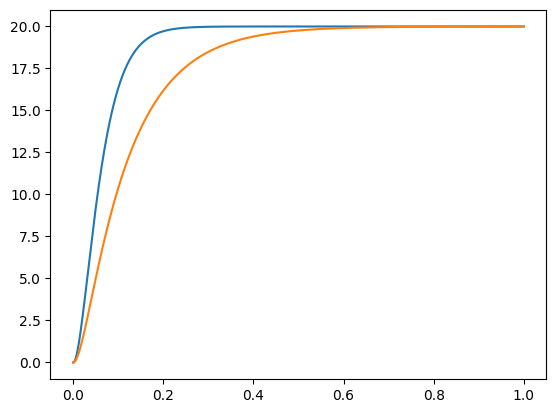

997, 63


In [47]:
ad = objetivo[0]        # Altura objetivo
a0 = 0                 # Altura inicial
seleccionado = poblacion[-1]  # Obtener el último individuo de la población final
kp = seleccionado[0]   # Valor de kp del individuo seleccionado
kd = seleccionado[1]   # Valor de kd del individuo seleccionado
t = np.linspace(0, 1, 1000)  # Vector de tiempo
a = respuesta(kp, kd, ad, a0, t)  # Calcular la respuesta del controlador
plt.plot(t, a)         # Graficar la respuesta del controlador
#a2 = respuesta(500, 63, ad, a0, t)
#plt.plot(t, a2)
plt.show()             # Mostrar la gráfica

# Imprimir los valores de t y a
print(f"{kp}, {kd}")
